In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

## Tests sur l'opérateur S

In [9]:
def test_approx_S(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        print("Nombre d'iterations :",nb_iter)
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    
    return px,fx

In [10]:
h = [1e-2,1,1/4]
p = [21,11,11]
epsilon = [1e-9,1e-5,1e-9]
fonctions = FT.fonctions_etude_S()

############################################################################################################
######################        Fonction absolu_h_retard, p = 21, h = 0.01, epsilon = 1e-09     #######################
############################################################################################################
Nombre d'iterations : 54
Nombre d'iterations : 54


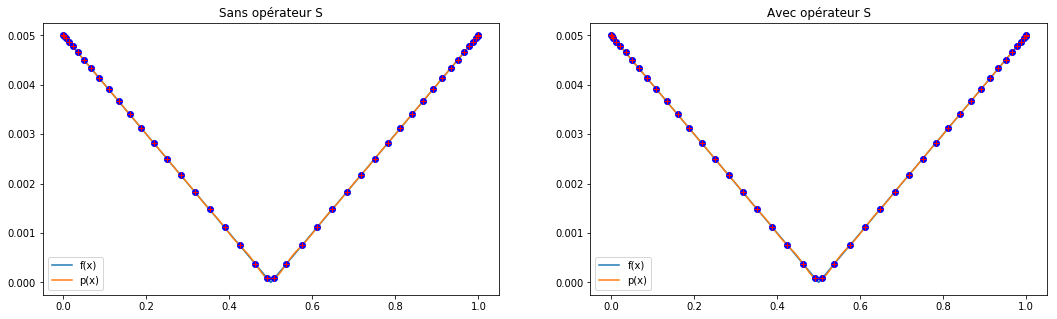

Sans opérateur Séparateur : 
     Norme 2 : 0.00019486991421648327
     Trapezes : 8.714847499152185e-07
Avec opérateur Séparateur : 
     Norme 2 : 0.00019486991421648327
     Trapezes : 8.714847499152185e-07

############################################################################################################
######################        Fonction abs_poly_h_7, p = 11, h = 1, epsilon = 1e-05     #######################
############################################################################################################
Nombre d'iterations : 100
Nombre d'iterations : 100


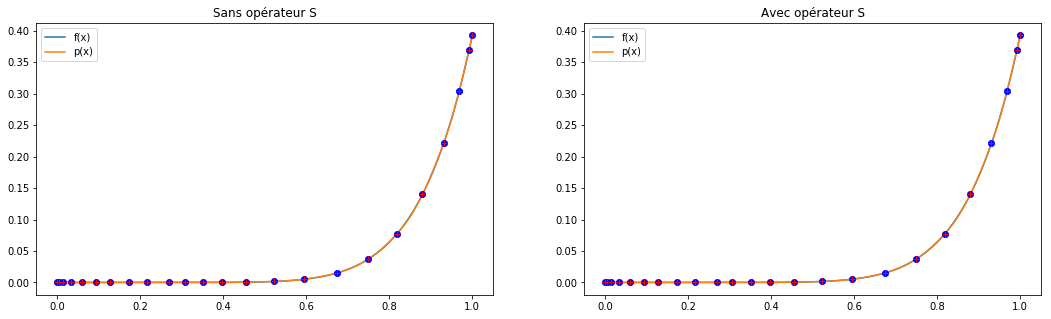

Sans opérateur Séparateur : 
     Norme 2 : 0.009420561143478633
     Trapezes : 0.00042130019442840073
Avec opérateur Séparateur : 
     Norme 2 : 0.009420561143478633
     Trapezes : 0.00042130019442840073

############################################################################################################
######################        Fonction gaussienne_h, p = 11, h = 0.25, epsilon = 1e-09     #######################
############################################################################################################
Nombre d'iterations : 100
Nombre d'iterations : 100


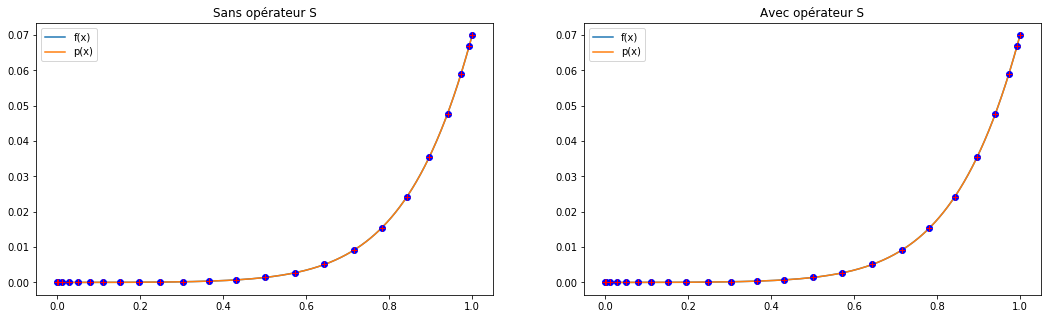

Sans opérateur Séparateur : 
     Norme 2 : 8.959228056073182e-05
     Trapezes : 2.003344295930293e-06
Avec opérateur Séparateur : 
     Norme 2 : 8.959228056073182e-05
     Trapezes : 2.003344295930293e-06



In [11]:
for i in range(3):
    name = str(fonctions[i]).split(' ')[1]
    print("############################################################################################################")
    print("######################        Fonction "+name+", p = "+str(p[i])+", h = "+str(h[i])+", epsilon = "\
          +str(epsilon[i])+"     #######################")
    print("############################################################################################################")
    plt.figure(0,figsize=(18,5))
    plt.subplot(1,2,1)
    sansS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Sans opérateur S")
    plt.subplot(1,2,2)
    avecS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Avec opérateur S")
    plt.show()
        
    print("Sans opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(sansS[0]-sansS[1]))
    print("     Trapezes :", trapezes(sansS[0]-sansS[1],h=h[i]))
    print("Avec opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(avecS[0]-avecS[1]))
    print("     Trapezes :",trapezes(avecS[0]-avecS[1],h=h[i]))
    print()

## Effet du point initial

In [6]:
def test_approx_init(p,f,h,epsilon,init,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,init=init,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    return px,fx,nb_iter

In [7]:
def X_equi(p):
    x = np.linspace(0,0.5,2*(p+1))
    X = np.zeros(2*(p+1))
    X[:p+1] = x[1::2]
    X[p+1:] = x[::2] 
    return X

################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


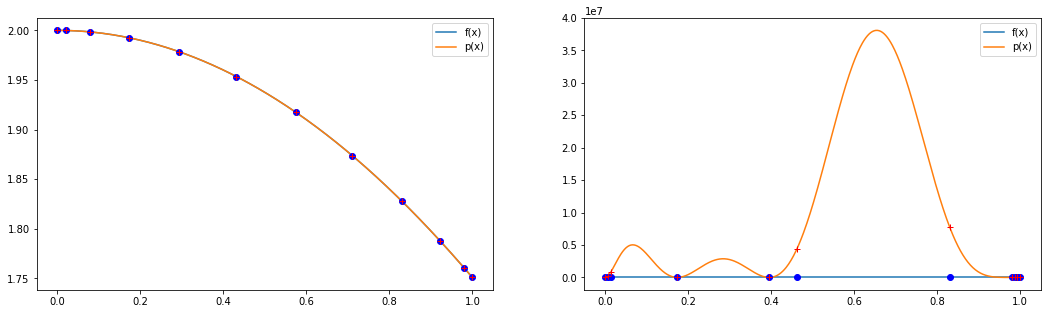

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.3019483973681332e-08     364315636.5409138
    Norme inf :  1.0293939034511368e-09     38096741.375088766
    Trapeze :  4.1171223316892714e-10     11520671.986833548
    Nb_iteration :  3.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


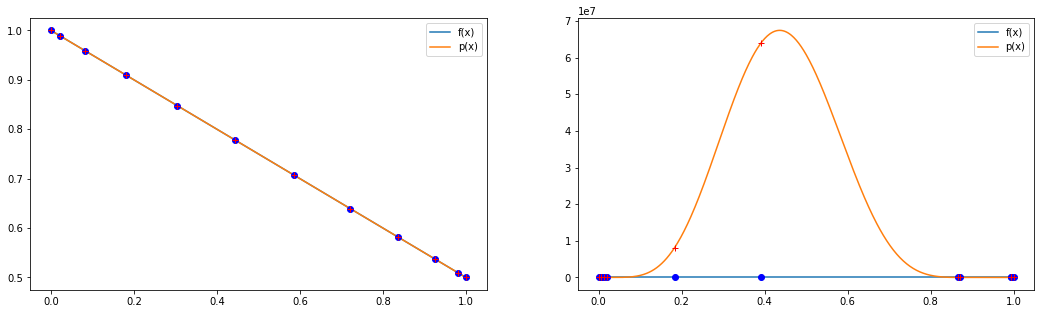

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.4808317140555867e-11     738457848.7731699
    Norme inf :  1.8600676554569873e-12     67456149.48275673
    Trapeze :  4.682801047761024e-13     23352087.58151395
    Nb_iteration :  7.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


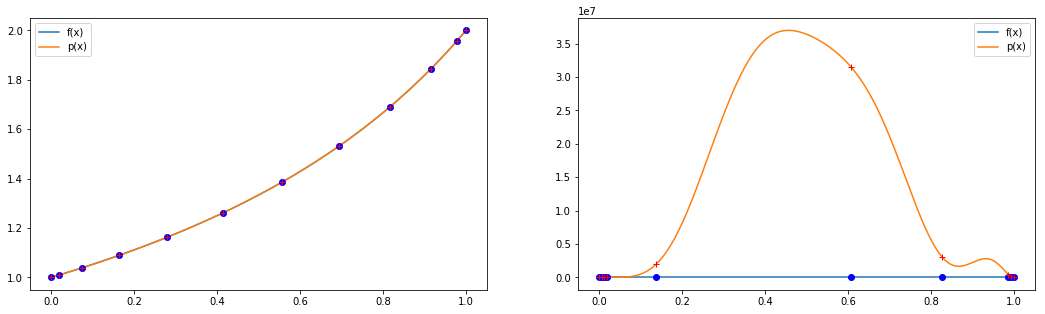

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.7517272059535274e-08     487680635.4608616
    Norme inf :  4.088006377855891e-09     36985081.523126334
    Trapeze :  1.5026280790601156e-09     15421815.788146015
    Nb_iteration :  8.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


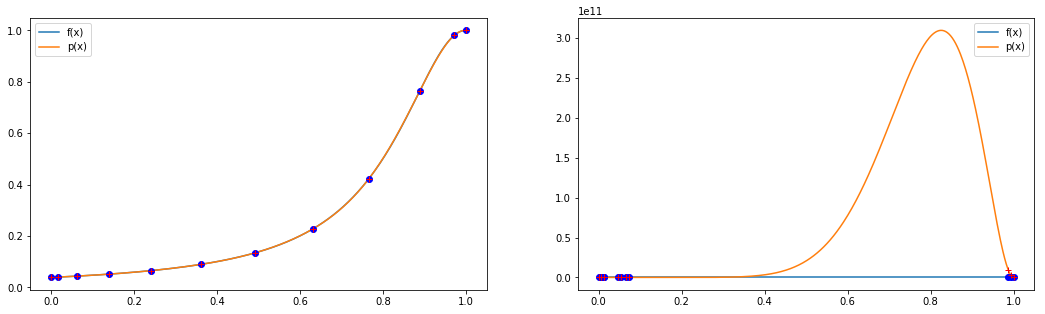

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.01270397547532363     3047396656773.8936
    Norme inf :  0.0017654082421006967     309695694737.4008
    Trapeze :  0.00040173497840942883     96367143693.8789
    Nb_iteration :  36.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


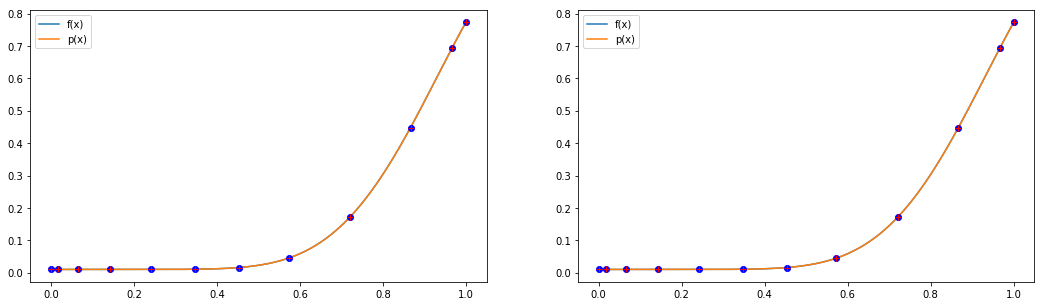

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  6.093782788716871e-05     6.090359309632902e-05
    Norme inf :  9.682068741745375e-06     9.677643205807662e-06
    Trapeze :  1.9270233178677934e-06     1.925940718725064e-06
    Nb_iteration :  67.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


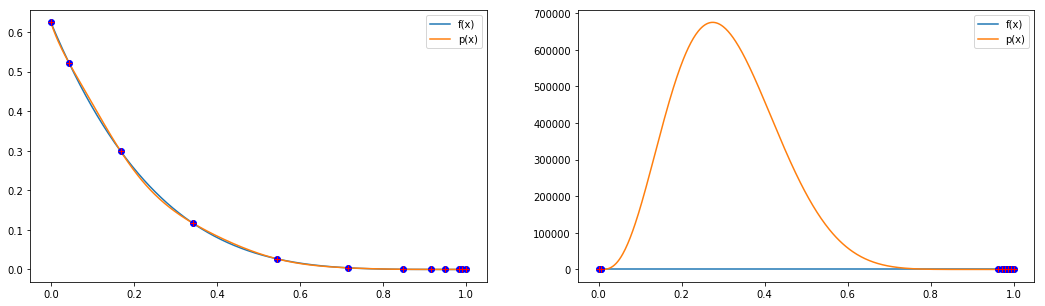

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.07902397696935387     7218479.948799421
    Norme inf :  0.009496827582904044     675018.1651397608
    Trapeze :  0.002498957569878482     228268.37882461803
    Nb_iteration :  100.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


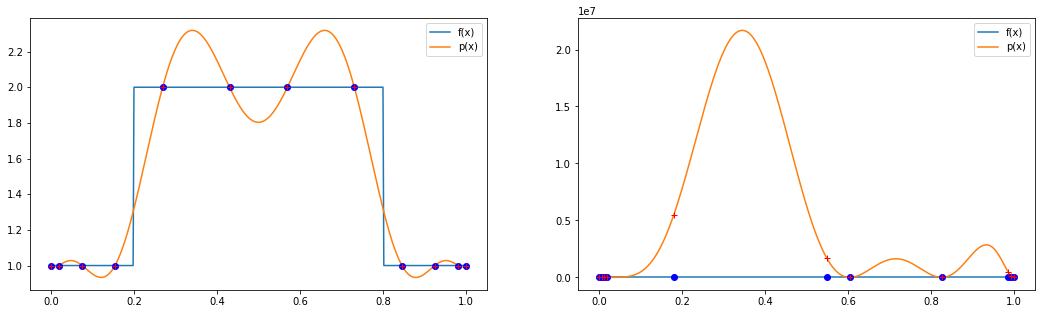

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.692139058865764     207324918.13774505
    Norme inf :  0.6807252017678374     21680384.098625503
    Trapeze :  0.14837846524254691     6556189.570232294
    Nb_iteration :  8.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


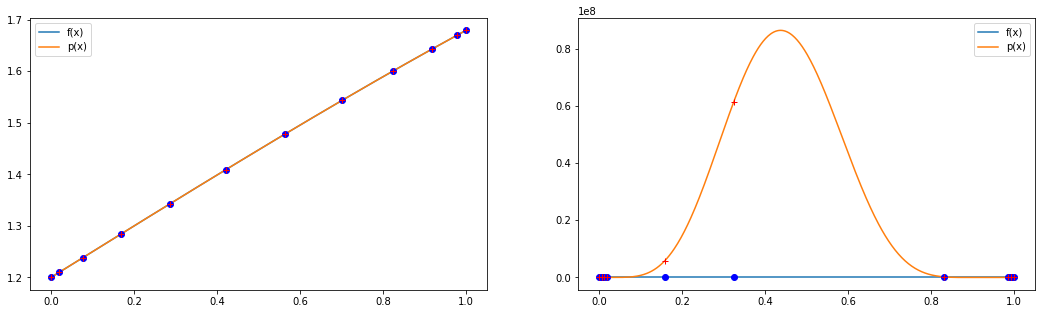

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  6.3023500769521226e-12     948503642.9336447
    Norme inf :  7.851497230149107e-13     86401031.222637
    Trapeze :  1.992978084253679e-13     29994318.80637391
    Nb_iteration :  5.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


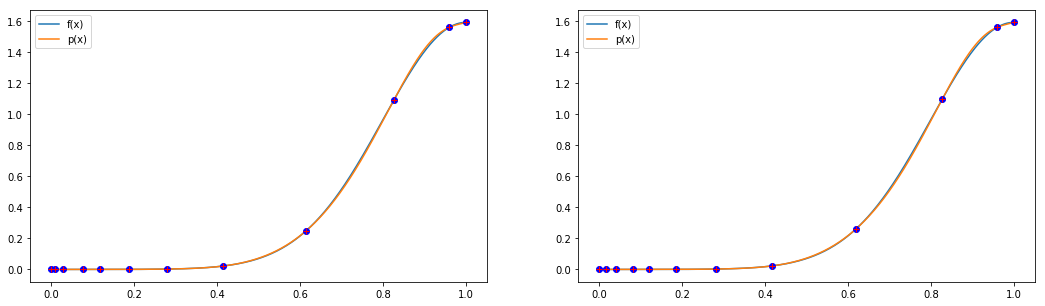

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.1262144011053176     0.1384438160961513
    Norme inf :  0.0152740266180178     0.016707182900559392
    Trapeze :  0.00399124981006877     0.004377977868293189
    Nb_iteration :  100.0     100.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


Polynome2p1.ipynb:33: RuntimeWarning: divide by zero encountered in double_scalars
  },


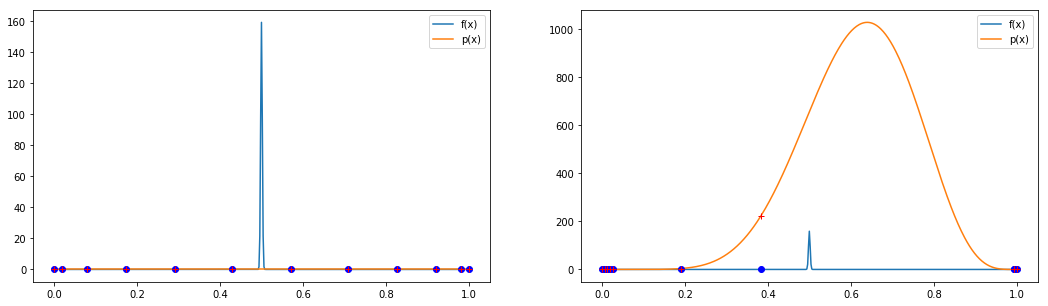

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  211.8995633303015     11353.161641342844
    Norme inf :  159.15494309089536     1028.537391688804
    Trapeze :  6.700852553188475     359.01849430699053
    Nb_iteration :  1.0     100.0




In [12]:
h = 1/2
p = 5
epsilon = 1e-9
fonctions = FT.fonctions("Sans Arg")
init = [init_X,X_equi]
Err = -1 * np.ones((len(fonctions),len(init),4))
    

for f in range(len(fonctions)) : 
    print("################################################################################################")
    print(("##########    Fonction "+str(fonctions).split(' ')[1]+", Init = "+ str(init).split(' ')[1]+", h ="+str(h)+\
    ", p"+str(p)+", eps = "+str(epsilon)+"        ################"))
    print("################################################################################################")
    plt.figure(figsize=(18,5))
    for i in range(len(init)) : 
        plt.subplot(1,2,i+1)
        try : 
            px,fx,nb_iter = test_approx_init(p,fonctions[f],h,epsilon,init[i],1,1)
            Err[f,i,0] = npl.norm(px-fx) 
            Err[f,i,1] = npl.norm(px-fx,np.inf)
            Err[f,i,2] = trapezes(px-fx,h=h)
            Err[f,i,3] = nb_iter
        except ValueError:
            print("Erreur\nX est devenu négatif ou supérieur à 1")
    plt.show()
    print("Erreur pour init_x et x_equi (respectivement): ")
    print("    Norme 2 : ", Err[f,0,0],"   ", Err[f,1,0])
    print("    Norme inf : ", Err[f,0,1],"   ", Err[f,1,1])
    print("    Trapeze : ", Err[f,0,2],"   ", Err[f,1,2])
    print("    Nb_iteration : ", Err[f,0,3],"   ", Err[f,1,3])
    print("\n")
       ##peut etre faire la différence entre les deux resultats